In [ ]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
!pip install geopandas
!pip install contextily
import pandas as pd
import geopandas
import contextily as ctx

In [ ]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g")
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g")
vaccini = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-latest.csv")

1. una mappa dell'Italia con le province colorate in base al numero di centri vaccinali Covid

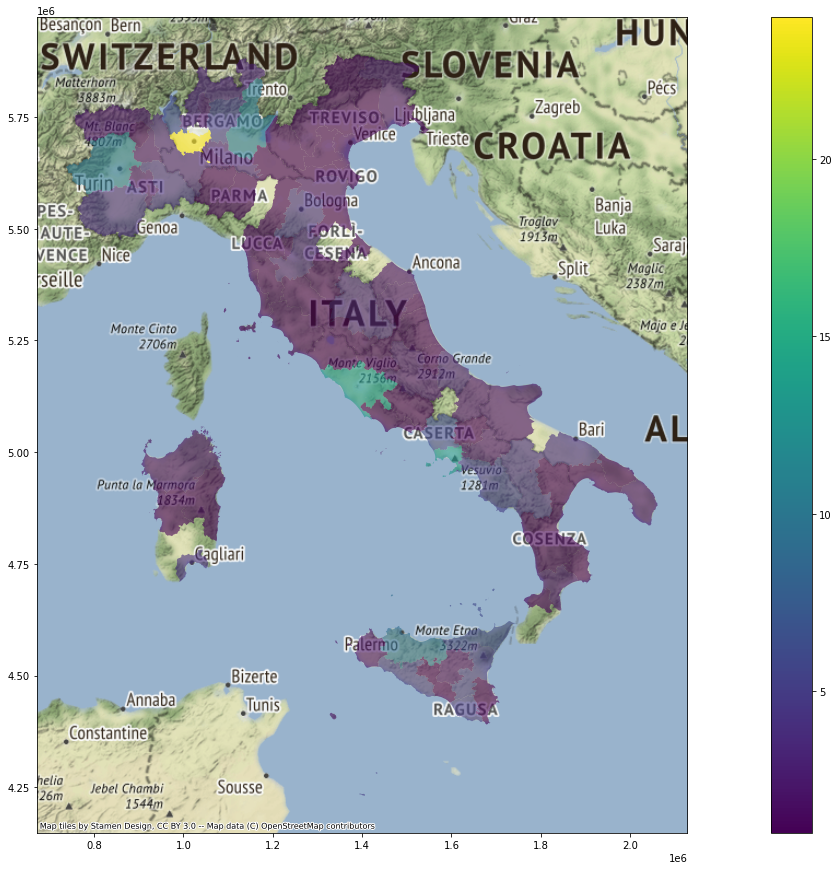

In [ ]:
province["DEN_UTS"] = province["DEN_UTS"].str.upper()
numero_presidi = vaccini.groupby("provincia", as_index = False)[["presidio_ospedaliero"]].count()
vaccini_province = pd.merge(province, numero_presidi, how = "outer", left_on = "DEN_UTS", right_on = "provincia")

ax = vaccini_province.to_crs(epsg=3857).plot(figsize = (30,15), column = "presidio_ospedaliero",  legend = True, alpha = 0.6)
ctx.add_basemap(ax)

2. una mappa dell'Italia con le regioni colorate in base alla percentuale di guariti dal Covid rispetto la popolazione

In [ ]:
guariti = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/soggetti-guariti.csv")
popolazione = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv")

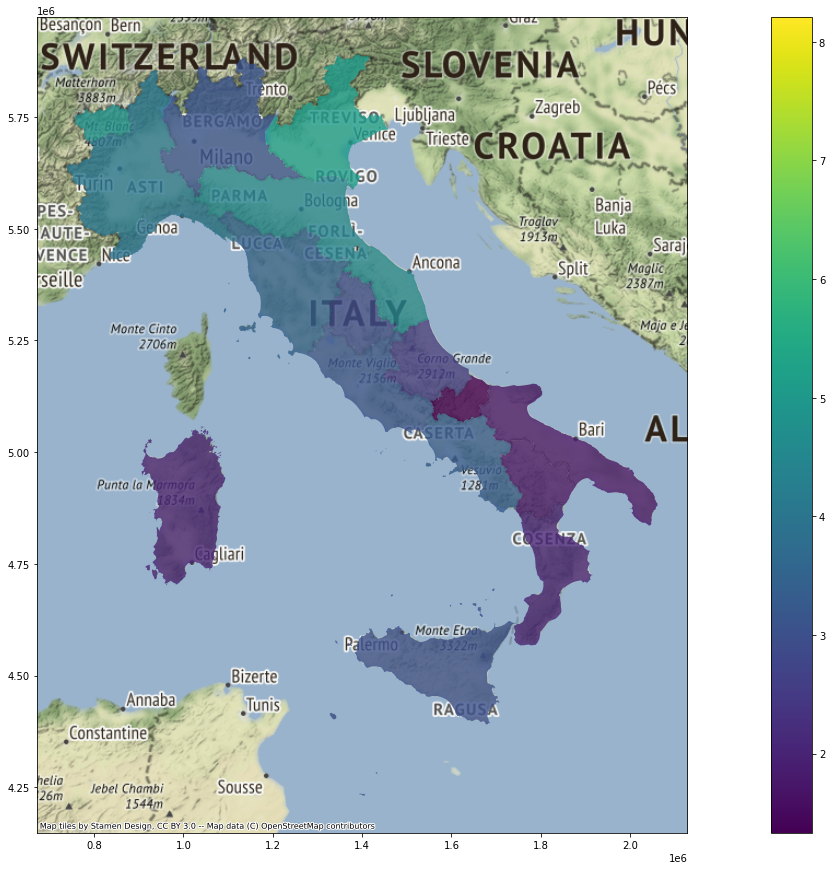

In [ ]:
guariti = guariti.groupby("nome_area", as_index = False)[["totale_guariti"]].sum()
popolazione = popolazione.groupby("nome_area", as_index = False)[["totale_popolazione"]].sum()
pop_guariti = pd.merge(popolazione, guariti, how = "outer", on = "nome_area")
pop_guariti["percentuale_guariti"] = (pop_guariti["totale_guariti"] / pop_guariti["totale_popolazione"]) * 100
regioni_percentuale = pd.merge(regioni, pop_guariti, how = "outer", left_on = "DEN_REG", right_on = "nome_area")

ax = regioni_percentuale.to_crs(epsg=3857).plot(figsize = (30,15), column = "percentuale_guariti",  legend = True, alpha = 0.8)
ctx.add_basemap(ax)

3. una mappa dell'Italia con le regioni colorate in rosso se la percentuale di vaccinati (prima vaccinazione) è inferiore alla media e in verde se l apercentuale di vaccinati è superiore alla media


In [ ]:
vaccinati = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-summary-latest.csv")
guariti = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/soggetti-guariti.csv")

In [ ]:
vaccinati = vaccinati.groupby("nome_area", as_index = False)[["prima_dose"]].sum()
media = vaccinati["prima_dose"].mean()
regioni_vaccinati = pd.merge(vaccinati, regioni, how = "outer", left_on = "nome_area", right_on = "DEN_REG")
regioni_vaccinati

,nome_area,prima_dose,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,Abruzzo,1046348.0,4.0,13.0,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147..."
1,Basilicata,453935.0,4.0,17.0,Basilicata,6.142055e+05,1.007274e+10,"MULTIPOLYGON (((1073707.061 4445700.106, 10737..."
2,Calabria,1510718.0,4.0,18.0,Calabria,8.378109e+05,1.521607e+10,"MULTIPOLYGON (((1083358.846 4416348.741, 10833..."
3,Campania,4528492.0,4.0,15.0,Campania,8.881667e+05,1.366325e+10,"MULTIPOLYGON (((1037313.692 4449410.367, 10373..."
4,Emilia-Romagna,3647682.0,2.0,8.0,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
5,Friuli-Venezia Giulia,961656.0,NaN,NaN,NaN,NaN,NaN,None
6,Lazio,4832987.0,3.0,12.0,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769..."
7,Liguria,1252625.0,1.0,7.0,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
8,Lombardia,8398142.0,1.0,3.0,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
9,Marche,1187118.0,3.0,11.0,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4..."
